<a href="https://colab.research.google.com/github/hnnayy/DeepLearning/blob/main/week1/IncomeClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torch.nn as nn
import torch.optim as optim
from tensorflow import keras
from tensorflow.keras import layers


In [ ]:
# Load dataset
df = pd.read_csv('income.csv')
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
48838,64,NaN,321403,HS-grad,9,Widowed,NaN,Other-relative,Black,Male,0,0,40,United-States,<=50K.
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


In [ ]:
print(df['income'])

0         <=50K
1         <=50K
2         <=50K
3         <=50K
4         <=50K
          ...  
48837    <=50K.
48838    <=50K.
48839    <=50K.
48840    <=50K.
48841     >50K.
Name: income, Length: 48842, dtype: object


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [ ]:
# Explore missing values
print(df.isnull().sum())

age                 0
workclass         963
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    274
income              0
dtype: int64


In [ ]:
# Handling missing values
categorical_cols = df.select_dtypes(include=['object']).columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

df[categorical_cols] = df[categorical_cols].fillna('Unknown')
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].median())

In [ ]:
#ubah income jadi biner
df['income'] = df['income'].replace({'<=50K': 0, '<=50K.' : 0, '>50K': 1,  '>50K.':1})

In [ ]:
print("isi data income setelah diubah : ", df['income'].unique())
print("dtype 'income': ", df['income'].dtype)  # Pastikan udah jadi int

isi data income setelah diubah :  [0 1]
dtype 'income':  int64


In [ ]:
# Encoding categorical features
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

In [ ]:
# Splitting features and target
X = df.drop(columns=['income'])
y = le.fit_transform(df['income'])


In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Define PyTorch
class IncomeClassifier(nn.Module):
    def __init__(self, input_dim):
        super(IncomeClassifier, self).__init__()
        self.fc1 = nn.Linear(input_dim, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.sigmoid(self.fc3(x))
        return x

input_dim = X_train.shape[1]
model = IncomeClassifier(input_dim)
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


In [ ]:
# Convert data to tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.reshape(-1, 1), dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.reshape(-1, 1), dtype=torch.float32)

In [ ]:
# Training PyTorch
epochs = 100
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()

In [ ]:
# TensorFlow
tf_model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(input_dim,)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

tf_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
tf_model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0)

C:\Users\HANIN\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Evaluation function
def evaluate_model(model, X, y):
    y_pred = model(X).detach().numpy().round()
    accuracy = accuracy_score(y, y_pred)
    precision = precision_score(y, y_pred)
    recall = recall_score(y, y_pred)
    f1 = f1_score(y, y_pred)
    auc = roc_auc_score(y, y_pred)
    return accuracy, precision, recall, f1, auc


In [ ]:
# PyTorch evaluation
pytorch_metrics = evaluate_model(model, X_test_tensor, y_test)

In [ ]:
import pandas as pd

# TensorFlow evaluation
y_pred_tf = tf_model.predict(X_test).round()
tf_metrics = (
    accuracy_score(y_test, y_pred_tf),
    precision_score(y_test, y_pred_tf),
    recall_score(y_test, y_pred_tf),
    f1_score(y_test, y_pred_tf),
    roc_auc_score(y_test, y_pred_tf)
)

# Nama metrik
metrics_names = ["Accuracy", "Precision", "Recall", "F1 Score", "AUC"]

# Buat tabel
results = pd.DataFrame({
    "Metric": metrics_names,
    "PyTorch": pytorch_metrics,
    "TensorFlow": tf_metrics
})

print(results)


306/306 ━━━━━━━━━━━━━━━━━━━━ 0s 571us/step
      Metric   PyTorch  TensorFlow
0   Accuracy  0.828539    0.846248
1  Precision  0.708845    0.719732
2     Recall  0.490021    0.593206
3   F1 Score  0.579463    0.650372
4        AUC  0.713044    0.759916


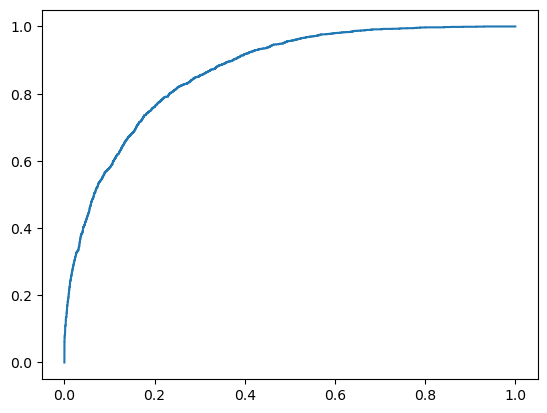

In [ ]:
# ROC Curve for PyTorch
fpr, tpr, _ = roc_curve(y_test, model(X_test_tensor).detach().numpy())
plt.plot(fpr, tpr, label='PyTorch ROC')

306/306 ━━━━━━━━━━━━━━━━━━━━ 0s 578us/step


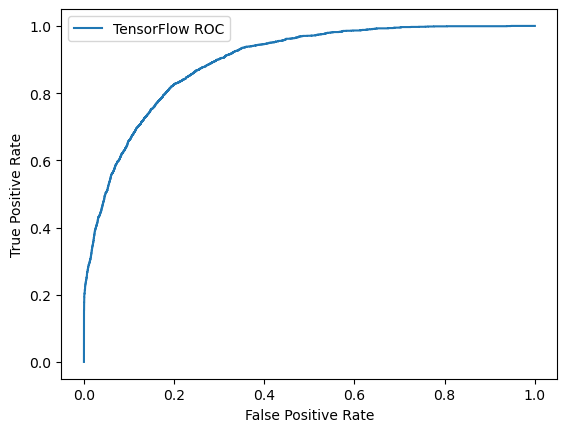

In [ ]:
# ROC Curve for TensorFlow
fpr_tf, tpr_tf, _ = roc_curve(y_test, tf_model.predict(X_test))
plt.plot(fpr_tf, tpr_tf, label='TensorFlow ROC')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()




1. Akurasi (Accuracy)
   - Akurasi adalah proporsi prediksi yang benar dari keseluruhan data.
   - Formula: (TP + TN) / (TP + TN + FP + FN)
   - Kelebihan: Mudah dipahami dan digunakan.
   - Kekurangan: Kurang efektif jika dataset tidak seimbang (misalnya, ketika satu kelas jauh lebih dominan daripada kelas lainnya).

2. Presisi (Precision)
   - Presisi mengukur proporsi prediksi positif yang benar.
   - Formula: TP / (TP + FP)
   - Kelebihan: Cocok digunakan jika biaya dari False Positive tinggi.
   - Kekurangan: Tidak memperhatikan False Negative.

3. Recall (Sensitivity atau True Positive Rate)
   - Recall mengukur seberapa baik model mendeteksi semua contoh positif.
   - Formula: TP / (TP + FN)
   - Kelebihan: Cocok digunakan jika biaya dari False Negative tinggi.
   - Kekurangan: Tidak memperhatikan False Positive.

4. F1 Score
   - F1 Score adalah rata-rata harmonis dari Presisi dan Recall.
   - Formula: 2 * (Precision * Recall) / (Precision + Recall)
   - Kelebihan: Memberikan keseimbangan antara Presisi dan Recall.
   - Kekurangan: Bisa kurang intuitif dibandingkan metrik lainnya.

5. AUC (Area Under Curve)
   - AUC mengukur seberapa baik model membedakan antara kelas positif dan negatif di berbagai threshold.
   - Nilai AUC berkisar antara 0 dan 1; semakin mendekati 1, semakin baik performa model.
   - Kelebihan: Memberikan gambaran umum performa model tanpa bergantung pada threshold tertentu.
   - Kekurangan: Interpretasi bisa kurang langsung dibandingkan metrik lainnya.

6. ROC (Receiver Operating Characteristic) Curve
   - ROC adalah plot antara True Positive Rate (Recall) dan False Positive Rate di berbagai threshold.
   - Kelebihan: Memberikan visualisasi kemampuan model dalam membedakan kelas.
   - Kekurangan: Memerlukan interpretasi visual.

Metrik terbaik tergantung pada konteks masalah:
- Jika keseimbangan antara positif dan negatif penting: F1 Score.
- Jika menghindari False Positive lebih penting: Precision.
- Jika menghindari False Negative lebih penting: Recall.
- Jika ingin gambaran umum performa model: AUC dan ROC.

Pada kasus ini, membandingkan metrik dari PyTorch dan TensorFlow dapat dilakukan dengan melihat nilai masing-masing metrik dan mempertimbangkan kebutuhan spesifik dari model yang sedang dikembangkan.



# Kesimpulan dan Perbandingan PyTorch dan TensorFlow

## 1. Pembuatan Model Deep Learning
Dalam tugas ini, dua model deep learning dibuat menggunakan PyTorch dan TensorFlow. Keduanya digunakan untuk memprediksi variabel target `income` pada dataset dengan pendekatan klasifikasi biner. Model terdiri dari lapisan-lapisan Dense (Fully Connected) dengan fungsi aktivasi ReLU dan Sigmoid untuk output. Model ini dilatih selama 100 epoch dengan optimizer Adam dan fungsi loss `Binary Crossentropy` (BCELoss).

---

## 2. Perbandingan Matriks Evaluasi
Berikut adalah hasil evaluasi kedua model:

| **Metric**   | **PyTorch** | **TensorFlow** |
|--------------|------------|----------------|
| **Accuracy** | 0.828539    | 0.846248       |
| **Precision**| 0.708845    | 0.719732       |
| **Recall**   | 0.490021    | 0.593206       |
| **F1 Score** | 0.579463    | 0.650372       |
| **AUC**      | 0.713044    | 0.759916       |

**Analisis:**

- **Accuracy (Akurasi)**: Model TensorFlow memiliki akurasi yang lebih tinggi (84.62%) dibandingkan PyTorch (82.85%), menunjukkan bahwa model TensorFlow lebih baik dalam mengklasifikasikan data secara keseluruhan.
- **Precision (Presisi)**: Presisi TensorFlow (71.97%) sedikit lebih baik dibandingkan PyTorch (70.88%). Ini berarti TensorFlow lebih baik dalam memprediksi positif yang benar dan mengurangi false positive.
- **Recall (Recall)**: Recall TensorFlow (59.32%) lebih tinggi dibandingkan PyTorch (49.00%), menunjukkan bahwa TensorFlow lebih baik dalam mendeteksi semua sampel positif.
- **F1 Score**: TensorFlow unggul dengan F1 Score 65.04%, yang merupakan keseimbangan antara presisi dan recall, dibandingkan PyTorch (57.95%).
- **AUC (Area Under Curve)**: AUC TensorFlow (75.99%) lebih besar dibandingkan PyTorch (71.30%), mengindikasikan bahwa model TensorFlow lebih baik dalam membedakan antara kelas positif dan negatif di berbagai threshold.

**Kesimpulan:**  
Berdasarkan semua metrik evaluasi, model TensorFlow menunjukkan performa yang lebih baik dibandingkan model PyTorch. Ini terlihat dari nilai akurasi, presisi, recall, F1 score, dan AUC yang lebih tinggi. Oleh karena itu, dalam konteks tugas ini, model TensorFlow adalah pilihan yang lebih baik.

---

## 3. Penjelasan Persamaan Matematika

## Metrik Evaluasi Model

### Accuracy (Akurasi)
Mengukur proporsi prediksi yang benar dari total data:

$$
Accuracy = \frac{True\ Positives + True\ Negatives}{Total\ Samples}
$$

### Precision (Presisi)
Mengukur proporsi prediksi positif yang benar dibandingkan total prediksi positif:

$$
Precision = \frac{True\ Positives}{True\ Positives + False\ Positives}
$$

### Recall (Recall)
Mengukur proporsi sampel positif yang berhasil terdeteksi dengan benar:

$$
Recall = \frac{True\ Positives}{True\ Positives + False\ Negatives}
$$

### F1 Score
Rata-rata harmonik dari presisi dan recall, memberikan keseimbangan antara keduanya:

$$
F1\ Score = 2 \times \frac{Precision \times Recall}{Precision + Recall}
$$

### AUC (Area Under Curve)
Mengukur kemampuan model dalam membedakan antara kelas positif dan negatif di berbagai threshold. AUC mendekati 1 menunjukkan performa yang sangat baik.

---

**Catatan:**  
ROC (Receiver Operating Characteristic) Curve juga telah dibuat untuk memvisualisasikan performa model dalam membedakan kelas positif dan negatif. ROC Curve TensorFlow lebih mendekati sudut kiri atas dibanding PyTorch, menunjukkan performa yang lebih baik.
